# <font style="color:rgb(50,120,229)">ML MODEL</font>
![image](..\images\framework.png)
<p style="text-align: center;"><b>Figure 1.</b> Machine Learning Framework</p>

## <font style="color:rgb(50,120,229)">1) Problem definition: What problem are we trying to solve?</font>


**The problem with machine learning is one of unsupervised learning.**

1. Do not have a label to predict. An example of this is using an algorithm to look at brain scans to find areas that may raise concern. You don't have labels on the images to understand what areas might raise reason for concern, but you can understand which areas are most similar or different from one another.

2. Are not trying to predict a label, but rather group our data together for some other reason! One example of this is when you have tons of data, and you would like to condense it down to a fewer number of features to be used (like this case).

*Clustering* is one of the most popular unsupervised approaches. This unsupervised learning task concerned with putting similar data into groups (This is the way we'll work on this case). Another form of unsupervised learning is *Dimensionality Reduction*, this task concerned with reducing the number of variables used.

## <font style="color:rgb(50,120,229)">2) Modeling: What kind of model should we use?</font>

One of the most popular clustering algorithms in all of machine learning is known as the **K-means algorithm**. This algorithm is used to cluster books, and articles that are similar which has helped to identify otherwise anonymous authors. It's also used to cluster similar movies and music for the purpose of recommending new items on Netflix or Spotify. Another very common use case of K-means is to cluster the behaviors of customers to better understand, similar groups of purchasers (In the K-means algorithm **'k'** represents the number of clusters you have in your dataset). In this case we want to find groups or clusters whose characteristics group **the largest number of homicidies**, and no one has any idea what **k** should be!. 

However, to understand what edge cases might occur when grouping points together, it is necessary to understand exactly what the k-means algorithm is doing. Here is one method for computing k-means:

1. Randomly place k centroids amongst your data.

Then within a loop until convergence perform the following two steps:

2. Assign each point to the closest centroid.

3. Move the centroid to the center of the points assigned to it.

At the end of this process, we should have k-clusters of points.

## <font style="color:rgb(50,120,229)">2) Evaluation: What define success for us?</font>

### <font style="color:rgb(50,120,229)">2.1) Elbow method for finding K</font>

Set when you can clearly see clusterings of point, as well as when there are some preconceived ideas about how many clusters might exist. But what about when you have no idea how many clusters might be in the data?, How might we determine the k in k-means for these cases?.

For this is the **Elbow method**. The way this works is that for any set of data, we could try fitting k-means with differing numbers of k, then for each value of k we can measure the the average distance of each point from the center point of the cluster. If we kept track of the average distance for each value of k, we could create a plot that looks like that in **Figure 2**.

The average distance will always decrease with each additional cluster center. However, with fewer clusters, those decreases will be more substantial. At some point, adding new clusters will no longer create a substantial decrease in the average distance. This point is known as the **elbow**.

![image](..\images\elbow.png)
<p style="text-align: center;"><b>Figure 2.</b> Elbow for finding K</p>

## <font style="color:rgb(50,120,229)">3) Data</font>

In [ ]:
!pip install plotly
!pip install helper_functions
!pip install kmodes

In [392]:
import sys
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px  
from IPython import display
import helper_functions as h
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

%matplotlib inline

In [393]:
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'

In [394]:
# data loading
DATA_PATH = pathlib.Path(r"..\data\homicidios2018_ml.csv") # OS agnostic PATH
dataset = pd.read_csv(str(DATA_PATH))

In [395]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Municipio           12498 non-null  object
 1   Día                 12498 non-null  object
 2   Hora                12498 non-null  int64 
 3   Zona                12498 non-null  object
 4   Clase de sitio      12498 non-null  object
 5   Arma empleada       12498 non-null  object
 6   Móvil Agresor       12498 non-null  object
 7   Móvil Victima       12498 non-null  object
 8   Edad                12498 non-null  int64 
 9   Sexo                12498 non-null  object
 10  Estado civil        12498 non-null  object
 11  País de nacimiento  12498 non-null  object
 12  Clase de empleado   12498 non-null  object
 13  Escolaridad         12498 non-null  object
dtypes: int64(2), object(12)
memory usage: 1.3+ MB


### In a previous notebook the data were processed in such a way that they were almost ready to be used by the machine learning model.


## <font style="color:rgb(50,120,229)">4) The Big Problem</font>


* The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. A **Euclidean distance** function on such a space isn't really meaningful. As someone put it, "The fact a snake possesses neither wheels nor legs allows us to say nothing about the relative value of wheels and legs." (from [here](https://www.daylight.com/meetings/mug04/Bradshaw/why_k-modes.html))

* There's a variation of k-means known as k-modes, introduced in [this paper](http://www.cs.ust.hk/~qyang/Teaching/537/Papers/huang98extensions.pdf) by Zhexue Huang, which is suitable for categorical data. Note that the solutions you get are sensitive to initial conditions, as discussed here ([PDF](https://arxiv.org/ftp/cs/papers/0603/0603120.pdf)), for instance.

* Huang's paper (linked above) also has a section on **k-prototypes** which applies to data with a mix of categorical and numeric features. It uses a distance measure which mixes the Hamming distance for categorical features and the Euclidean distance for numeric features [SOURCE](https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data).

## <font style="color:rgb(50,120,229)">5) Modeling 2: What kind of model should we use?</font>


**Since the basis of K-means is that clusters give us an idea of how the data are grouped from from its characteristics. The dimensions associated with categories should not be forced into a spatial representation.** [SOURCE](https://medium.com/@davidmasse8/unsupervised-learning-for-categorical-data-dd7e497033ae)

Introduced in 1998 by Zhehue Huang, k-modes provides a much-needed alternative to k-means when the data at hand are categorical rather than numeric. That k-modes has not been more widely adopted, at least in Python, is probably related to the lack of a scikit-learn implementation.

The procedure is similar to k-means: a number of clusters (k) is chosen, and k cluster-mode vectors are chosen at random (or according to accepted heuristics).

* Observations are assigned to the closest cluster mode by Hamming distance.

* New cluster modes are calculated, each from the observations associated with an previous cluster mode.

* Steps 1 and 2 are repeated until the cluster modes stabilize. As with k-means, this stable condition could be due to a local minimum in the cost function. (It turns out that finding the optimal clustering partition is NP-hard, meaning it cannot solved in less than polynomial time.)

## <font style="color:rgb(50,120,229)">6) Evaluation 2: What define success for us?</font>


The distance metric used for K-modes is instead **the Hamming distance** from information theory. The Hamming distance (or dissimilarity) between two rows is simply the number of columns where the two rows differ.

![image](..\images\math1.png)
<p style="text-align: center;"><b>Figure 3.</b> The Hamming distance</p>

The **k-modes** algorithm tries to minimize the sum of within-cluster Hamming distance from the mode of that cluster, summed over all clusters. What is the mode of a cluster? To quote Huang, “if a dataset has m categorical attributes, the mode vector Z consists of m categorical values … each being the mode of an attribute.”  [SOURCE](https://medium.com/@davidmasse8/unsupervised-learning-for-categorical-data-dd7e497033ae)

## <font style="color:rgb(50,120,229)">7) Experiments: What have we try / What else can we try?</font>


At this point I want to start by analyzing the algorithm with as few variables as possible, And only use the variables that you feel you can really bring to the model (All this is done from a subjective point of view). **A larger number of variables can be included later**.

In [476]:
dataset_few1 = dataset.drop(["Clase de sitio", "Estado civil", "País de nacimiento", "Clase de empleado", "Escolaridad"], axis=1)
dataset_few2 = dataset.drop(["Día", "Clase de sitio", "Arma empleada", "Estado civil", "País de nacimiento", "Clase de empleado", "Escolaridad", "Municipio", "Edad"], axis=1)

# The number of variables has to be greatly reduced so that the model can extract some information
dataset_few2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hora           12498 non-null  int64 
 1   Zona           12498 non-null  object
 2   Móvil Agresor  12498 non-null  object
 3   Móvil Victima  12498 non-null  object
 4   Sexo           12498 non-null  object
dtypes: int64(1), object(4)
memory usage: 488.3+ KB


In [477]:
# Converting age and hour into categorical variable.
"""
dataset_few2['Edad_bin'] = pd.cut(dataset_few2['Edad'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=["0-20", "20-30", "30-40", "40-50","50-60","60-70","70-80", "80-90","90-100"],
                                 include_lowest=True)
dataset_few2  = dataset_few2.drop('Edad',axis = 1)
"""

'\ndataset_few2[\'Edad_bin\'] = pd.cut(dataset_few2[\'Edad\'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], \n                              labels=["0-20", "20-30", "30-40", "40-50","50-60","60-70","70-80", "80-90","90-100"],\n                                 include_lowest=True)\ndataset_few2  = dataset_few2.drop(\'Edad\',axis = 1)\n'

In [478]:

dataset_few2['Hora_bin'] = pd.cut(dataset_few1['Hora'], [0, 3, 6, 9, 12, 15, 18, 21, 23], 
                              labels=["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-23"],
                                 include_lowest=True)
dataset_few2  = dataset_few2.drop('Hora',axis = 1)
dataset_few2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12498 entries, 0 to 12497
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Zona           12498 non-null  object  
 1   Móvil Agresor  12498 non-null  object  
 2   Móvil Victima  12498 non-null  object  
 3   Sexo           12498 non-null  object  
 4   Hora_bin       12498 non-null  category
dtypes: category(1), object(4)
memory usage: 403.3+ KB


In [479]:
# Make a copy for the original data
dataset_few2_copy = dataset_few2.copy()

In [480]:
# Data Preparation
le = preprocessing.LabelEncoder()
dataset_few2 = dataset_few2.apply(le.fit_transform)
dataset_few2.head()

,Zona,Móvil Agresor,Móvil Victima,Sexo,Hora_bin
0,1,0,0,1,6
1,1,0,0,1,6
2,0,0,0,1,6
3,0,0,0,1,0
4,0,0,0,1,0


In [481]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1, max_iter=20)
fitClusters_cao = km_cao.fit_predict(dataset_few2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 1846, cost: 11575.0
Run 1, iteration: 2/20, moves: 344, cost: 11575.0


In [482]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 4, ..., 0, 4, 0], dtype=uint16)

In [483]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = dataset_few2.columns

In [484]:
# Mode of the clusters
clusterCentroidsDf

,Zona,Móvil Agresor,Móvil Victima,Sexo,Hora_bin
0,1,0,0,1,3
1,0,8,0,1,0
2,0,0,0,1,2
3,0,0,0,1,1
4,0,0,0,1,6
5,1,8,0,1,1


In [485]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=6, init = "Huang", n_init = 1, verbose=1, max_iter=20)
fitClusters_huang = km_huang.fit_predict(dataset_few2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 131, cost: 12328.0


In [486]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [487]:
# Choosing K by comparing Cost against each K

Hamming_distance = []
K = range(1,10)
for k in K:
    kmode = KModes(n_clusters=k, init = "Cao", n_init = 11, verbose=1, max_iter=20)
    kmode.fit_predict(dataset_few2)
    Hamming_distance.append(kmode.cost_)
    print("For n_clusters =", k,
          "the Hamming distance is:", kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 0, cost: 18100.0
For n_clusters = 1 the Hamming distance is: 18100.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 0, cost: 16832.0
For n_clusters = 2 the Hamming distance is: 16832.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 2108, cost: 13603.0
For n_clusters = 3 the Hamming distance is: 13603.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/20, moves: 1817, cost: 13098.0
For n_clusters = 4 the

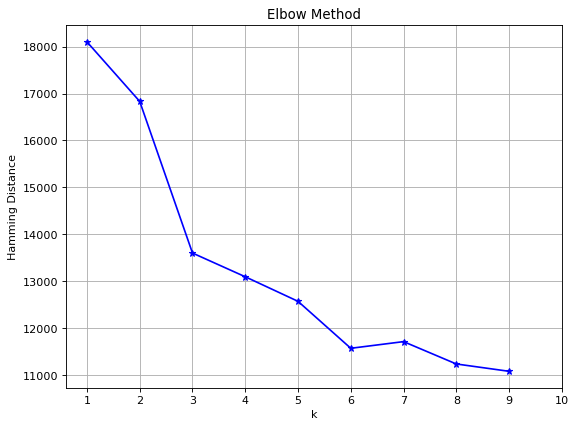

In [535]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(K, Hamming_distance, 'b*-')
plt.xlabel('k')
plt.xticks(np.linspace(1, 10, 10))
plt.ylabel('Hamming Distance')
plt.title("Elbow Method")
plt.grid()
plt.show()

In [523]:
## Choosing K=6
k = 6

In [524]:
km_cao = KModes(n_clusters=k, init = "Cao", n_init = 11, verbose=2)
fitClusters_cao = km_cao.fit_predict(dataset_few2)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1846, cost: 11575.0
Run 1, iteration: 2/100, moves: 344, cost: 11575.0


In [525]:
fitClusters_cao

array([0, 0, 4, ..., 0, 4, 0], dtype=uint16)

In [526]:
data_few = dataset_few2_copy.reset_index()

In [527]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_few, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [528]:
combinedDf.head()

,Zona,Móvil Agresor,Móvil Victima,Sexo,Hora_bin,cluster_predicted
0,URBANA,A PIE,A PIE,MASCULINO,6-9,0
1,URBANA,A PIE,A PIE,MASCULINO,6-9,0
2,RURAL,A PIE,A PIE,MASCULINO,6-9,4
3,RURAL,A PIE,A PIE,MASCULINO,0-3,1
4,RURAL,A PIE,A PIE,MASCULINO,0-3,1


In [529]:
# Cluster Identification

cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
#cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
#cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
#cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]

In [530]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8083 entries, 0 to 12497
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Zona               8083 non-null   object  
 1   Móvil Agresor      8083 non-null   object  
 2   Móvil Victima      8083 non-null   object  
 3   Sexo               8083 non-null   object  
 4   Hora_bin           8083 non-null   category
 5   cluster_predicted  8083 non-null   uint16  
dtypes: category(1), object(4), uint16(1)
memory usage: 339.8+ KB


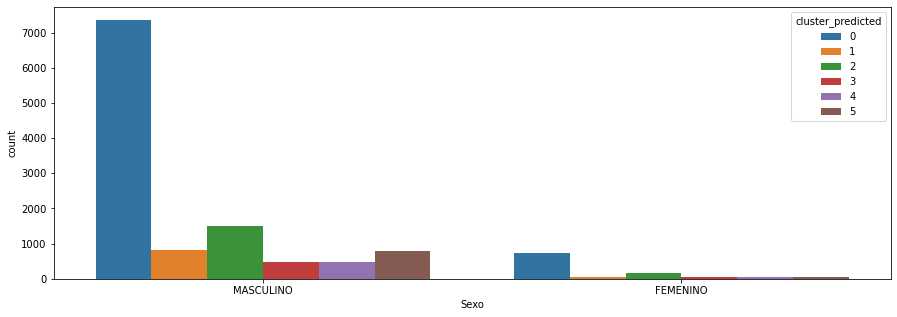

In [531]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Sexo'],order=combinedDf['Sexo'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

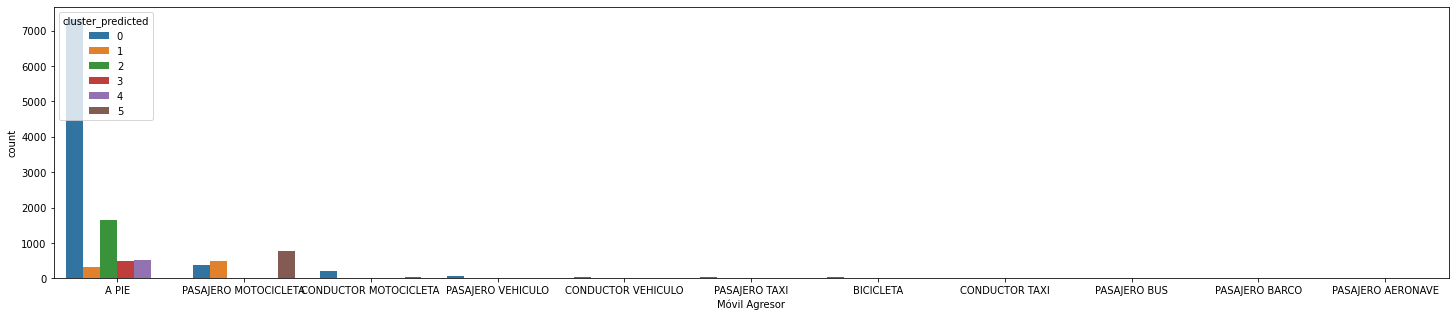

In [534]:
plt.subplots(figsize = (25,5))
sns.countplot(x=combinedDf['Móvil Agresor'],order=combinedDf['Móvil Agresor'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

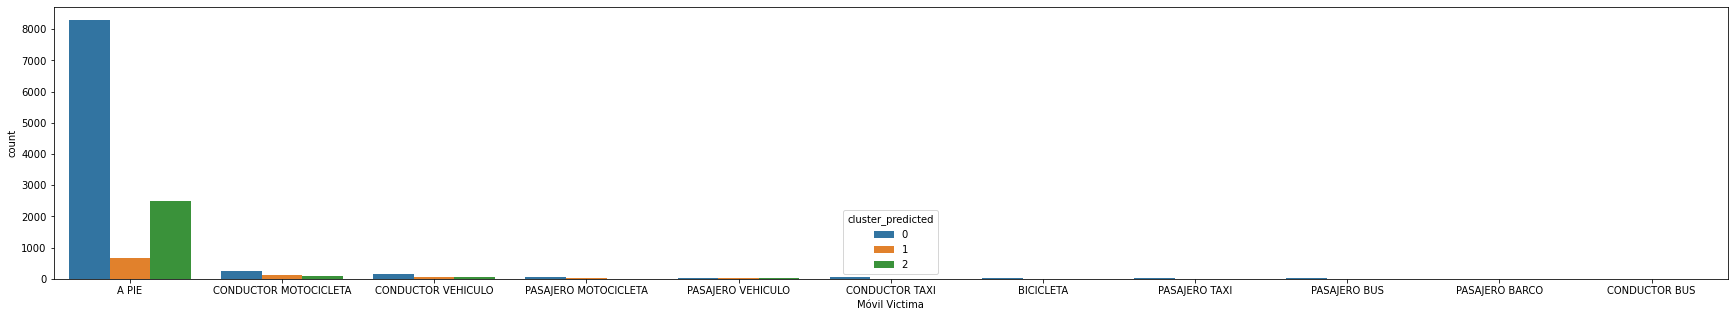

In [510]:
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Móvil Victima'],order=combinedDf['Móvil Victima'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

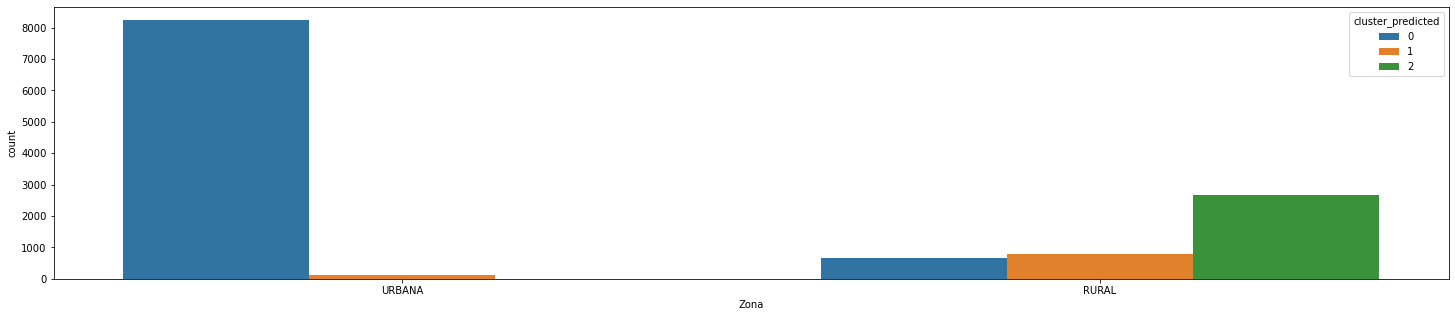

In [513]:
plt.subplots(figsize = (25,5))
sns.countplot(x=combinedDf['Zona'],order=combinedDf['Zona'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

* **DON'T WORK REALLY WELL**
* There is not much important information that can be extracted from these groups
* From the sex and the transportation of the aggressor it can be extracted that the murderers who use motorcycles are men
* Men who die in rural areas, their perpetrators usually travel on foot.

* The K-mode model is quite limited in the amount of data it can receive and the way it can be grouped (A better strategy might have been established).

* It is necessary to use **deep learning algorithms** to create micro clusterings that allow to relate the regions of one map and to be able to establish relations between the studied variables

## <font style="color:rgb(50,120,229)">8) Experiments 2: SOM(Self-organizing map) + kMode</font>
